# Choosing a real world phenomenon and dataset

As I work in an insurance company and I am part of a team supporting a global claims administration operation I will pick a dataset that would be consistent with my work environment.
Claims administration have a rich and deep dataset,with numerous interactions with customers and different channels of communication.

When someone buys an insurance policy key information is provided by the customer and when somone makes a claim on their insurance policy further information is provided by the claimant/customer.At first glance there are two potential phenomenons:
 1. A customer making a claim provides numerous datapoints,for example policy start date,incident date,claim date,claim amount.All this information enables companies to calculate key financial and actuarial measures,for example claim reserves,headcount requirements,profitability,claim frequency.
 2. Claims service being measured....customer experiance (eg.Net Promotor Score) and operational Key Performance Indicators(eg. response times,customer effort)

The type of insurance that I will base my analysis on will be payment protection insurance.Payment protection insurance (PPI) is insurance that will pay out a sum of money to help you cover your monthly repayments on mortgages, loans, credit/store cards or catalogue payments if you are unable to work. This may be as a result of illness, accident, death or unemployment and will be covered on your policy [1].PPI is sold to customers between 18 and 65 years of age.

### The phenomenon that I will base my project on will be the profile of customers who make a PPI claim.I have the following Hypotheses:

#### 1.The credit score of a customer would be medium to high
    As PPI is insuring loan repayments the customer would have gone through credit scoring,which is a typical practice of 
    banks in assessing loan applications.
    
#### 2.The typical age profile of customers would be 40's
    As people approach middle age their financial demands are highest(eg. early to middle stages of mortgage,
    kid college loans).The older you get the more repayments you have made and historically people in their 50's and 60's
    would have cleared their mortgages.

### I will use a dataset of 150 customers in my simulation


# Types of variables and distributions

## Credit Score
There are a number of credit score models globally,but I will use the FICO score [2],where the best credit score is 850 and the worst is 300.The following diagram shows the ranges and % of population that fall into each range.

![FICO](https://raw.githubusercontent.com/mikequaid/data/master/FICO.PNG)

The FICO credit scores is calculated based on the following:
    - 35%: Payment history
    - 30%: Amounts owed on credit and debt
    - 15%: Length of credit history
    - 10%: New credit
    - 10%: Types of credit used

In [2]:
# The number of customers will be evenly distributed within the range of 580 to 850.
# I am excluding the range of 300 to 579 as it is unlikely that customers in this range would get a loan
# I will use random.uniform function to randomly distribute 150 customers within the range 580 to 850

import numpy as np
import matplotlib.pyplot as plt
c = np.random.uniform(580,850,150).round(0) # randomly applies a credit score to each customer
plt.hist(c,bins)
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.title("Histogram of credit scores")
plt.grid(True)
plt.show()

NameError: name 'bins' is not defined

In [ ]:
c

## Customer age

    - The average age of a first-time mortgage borrower is 34 years as per Central Bank [3].Based on the all borrowers (new 
    and old) I would expect the average age to be in the mid-40's.Based on the Bondora peer-to-peer lending platform the 
    average age of a borrower is 43 years [4].
    - Normal lending rules would incorporate a lower age threshold and upper age threshold,25 years and 65 years would be
    representative of these thresholds.


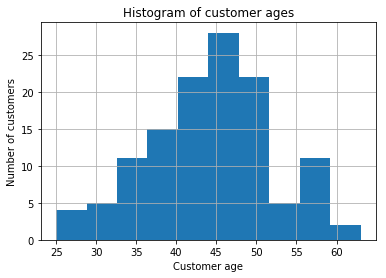

In [4]:
# An appropriate method of distribution when there are lower and upper limits would be Triangular distribution [5]
# I will use random.triangular function to distribute 150 customers within a lower age of 25,upper age of 65 and mode age of 43

age=np.random.triangular(25, 43, 65, 125).round()
h = plt.hist(age, bins=10)
plt.xlabel('Customer age')
plt.ylabel('Number of customers')
plt.title("Histogram of customer ages")
plt.grid(True)
plt.show()

In [5]:
len(age) # Confirming that number of customer ages is 125

125

In [26]:
# genereate gender of customer where male = 0 and female = 1
g = np.random.binomial(1, .5, 150)
g

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [27]:
g2=np.random.choice(["M","F"], 150, p=[0.52, 0.48])
g2

array(['M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'M',
       'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M',
       'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F',
       'F', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M',
       'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F',
       'M', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'F',
       'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F',
       'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F',
       'F', 'F', 'F', 'F', 'M', 'F', 'M'], dtype='<U1')

In [22]:
department = (["Munster", "Leinster", "Conn", "Ulster"])
np.random.seed(46)
dept = [np.random.choice(department) for i in range(125)]
len(dept)

125

In [10]:
import pandas as pd
data = {'Credit score': [c],'Age': [age],'Gender': [gender]}
df = pd.DataFrame(data)
# df = pd.DataFrame(data, index=['rank1','rank2','rank3'])
# data = ('Credit score':c,'Age':age,'Gender':gender)
print(df)

                                        Credit score  \
0  [835.0, 659.0, 654.0, 582.0, 841.0, 625.0, 582...   

                                                 Age  \
0  [47.0, 50.0, 54.0, 44.0, 37.0, 56.0, 51.0, 58....   

                                              Gender  
0  [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...  


In [33]:
import pandas as pd
data = {'score': [c],'Age': [age],'G': [g]}
df = pd.DataFrame(data)

In [34]:
# df.head(10, dtype=np.integer)
df.head(10).round()

,score,Age,G
0,"[835.0, 659.0, 654.0, 582.0, 841.0, 625.0, 582...","[47.0, 50.0, 54.0, 44.0, 37.0, 56.0, 51.0, 58....","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, ..."


In [31]:
df2 = pd.DataFrame({"score" : c, "Age" : age, "G" : g,})
df2

ValueError: arrays must all be same length

In [18]:
import pandas as pd
data = {'score': [c],'Age': [age],'Gender': [gender]}
df.columns = (["'score'", "Age", "Gender"])
df.index = (["Sequence"])
df = pd.DataFrame(data)
df.head(10).round()

,score,Age,Gender
0,"[835.0, 659.0, 654.0, 582.0, 841.0, 625.0, 582...","[47.0, 50.0, 54.0, 44.0, 37.0, 56.0, 51.0, 58....","[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ..."


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 34, 0.2 # Create Mean and Standard Deviation variables
s = np.random.normal(mu, sigma, 150)
 
count, bins, ignored = plt.hist(s, 20, normed=True) # Create the bins and histogram 

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='r')
plt.xlabel('Mean and standard deviations') # x axis label 
plt.title(' Normal distribution') # Add title
plt.show()


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(18, 65, 10) # linspace returns evenly spaced numbers over a specified interval

plt.hist([cust_age], bins, label=['Customer Age']) # Adding distribution samples and labelling them
plt.ylabel('Count of customers') # y axis label
plt.xlabel('Customer Age') # x axis label
plt.title('Customer age') # add title

plt.show()

In [ ]:
# genereate gender of customer where male = 0 and female = 1
gender = np.random.binomial(1, .5, 150)
gender

In [ ]:
import pandas as pd
rng = pd.date_range('1/1/2018', periods = 150, freq = 'W')
rng

In [ ]:
# Display the spread of customer ages,note that insurance is sold to customers between 18 and 65 years of age
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
 
cust = np.random.choice(101, 100) # generates an array of 100 numbers between 1 and 100
cust_age = np.random.randint(18, 65, 100) # randomly assigns ages between 18 and 65 years of age
sns.scatterplot(cust,cust_age)
plt.xlabel("Count of customers")
plt.ylabel("Customer age")
plt.show()

In [6]:
# line graph
df.plot(y=['score','Age'], use_index=True)

plot.bar()

NameError: name 'df' is not defined

In [ ]:
import seaborn as sns

sns.lineplot(x="Age", y="Gender", data=df[1:])

Categorical variable- occupation

# References:

[1] CPCC https://www.ccpc.ie/consumers/money/insurance/payment-protection-insurance/

[2] Wikipedia FICO https://en.wikipedia.org/wiki/Credit_score_in_the_United_States#FICO_score

[3] Central Bank Economic Publication 25/05/2017:Measures and Irish Mortgage Lending: An Overview of Lending in 2016 https://www.centralbank.ie/docs/default-source/publications/economic-letters/vol-2017-no-6---macroprudential-and-irish-mortgage-lending-an-overview-of-lending-in-2016-kinghan-lyons-mccarthy-and-o'toole.pdf?sfvrsn=6

[4]   https://www.bondora.com/blog/what-is-the-average-age-of-our-borrowers/

[5] Wikipedia https://en.wikipedia.org/wiki/Triangular_distribution




  https://files.consumerfinance.gov/f/documents/201605_cfpb_nsm-technical-report-16-01.pdf
  
  